# Lab 2
## Solution
### John Evans
### 10/22/18

#### Imports, constants, functions

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300

p_mean       = 3.0       # GeV/c
p_sigma      = 0.3       # GeV/c
decay_length = 150.0     # m
location     = 1000      # m
detect_rad   = 1         # m
m_pion       = 0.13957   # GeV/c^2
m_muon       = 0.1057    # GeV/c^2
m_numu       = 0         # GeV/c^2
c            = 2.9979e8  # m/s
t_pion       = 2.6033e-8 # s

# Choose a number of pions to simulate. For the number of bins I chose in the histogram in part 5 (50),
# 10^8 is a good choice, but it is on the limit of what a computer can do quickly
n_pions = int(1e8)

def p4_hist(p4):
    '''
    Accepts an array of 4-momenta with the shape (n, 4) where n is the number of 4-momenta being plotted.
    Each 4-momentum is of the form (E, p_x, p_y, p_z).
    
    Produces 4 histograms: one for each component of the 4-momenta. The primary use of this is for debugging
    as 4-momenta are modified.
    
    Returns the figure and axes of the plots
    '''
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.25))
    fig.tight_layout()
    
    titles = ['E', r'$p_x$', r'$p_y$', r'$p_z$']
    
    for p,ax,title in zip(p4.T, axes.flatten(), titles):
        ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
        hist,_,_ = ax.hist(p, bins = 50, histtype = 'step', align = 'left')
        ax.set_title(title)
    
    return fig, axes
    
def two_body_decay(M,m1,m2, size = 1):
    '''
    This is a modified version of Prof. Sullivan's function. The primary difference is that this function is
    built to return a numpy array of 4-momenta of shape (size,4)
    '''
    # Empty starting array
    p4 = np.zeros((size, 4))
    
    # Constant energy based on masses
    p4[:,0] = (M**2 + m1**2 - m2**2)/(2.0*M)      # E1=(M**2+m1**2-m2**2)/(2*M)
    
    # Momentum magnitude based on energy and mass
    P1 = np.sqrt(p4[:,0]**2 - m1**2)
    
    # Random angular components
    phi       = 2.0*np.pi*np.random.random(size)  # random phi 0-2pi
    cos_theta = -1.0 + 2.0*np.random.random(size) # random cos theta -1 to 1
    sin_theta = np.sqrt(1. - cos_theta**2)
    
    # Cartesian components of momentum transformed from random angular components
    p4[:,1]   = P1*sin_theta*np.cos(phi)
    p4[:,2]   = P1*sin_theta*np.sin(phi)
    p4[:,3]   = P1*cos_theta
    
    return p4

def Lorentz_transform(p4_rest, gamma, beta):
    '''
    This is a modified version of Prof. Sullivan's function. The difference is that this function accepts a
    numpy array for each parameter. p4_rest is an array of 4-momenta of shape (n,4) where n is the number of
    4-momenta being operated on. gamma and beta are expected to have length of n.
    '''
    # Empty starting array
    p4_lab = np.zeros((len(gamma), 4))
    
    # Lorentz transform assuming boost in z-direction
    p4_lab[:,0] = gamma*(p4_rest[:,0] + beta*p4_rest[:,3])
    p4_lab[:,1] = p4_rest[:,1]
    p4_lab[:,2] = p4_rest[:,2]
    p4_lab[:,3] = gamma*(p4_rest[:,0]/beta + p4_rest[:,3])
    
    return p4_lab

#### Part 1

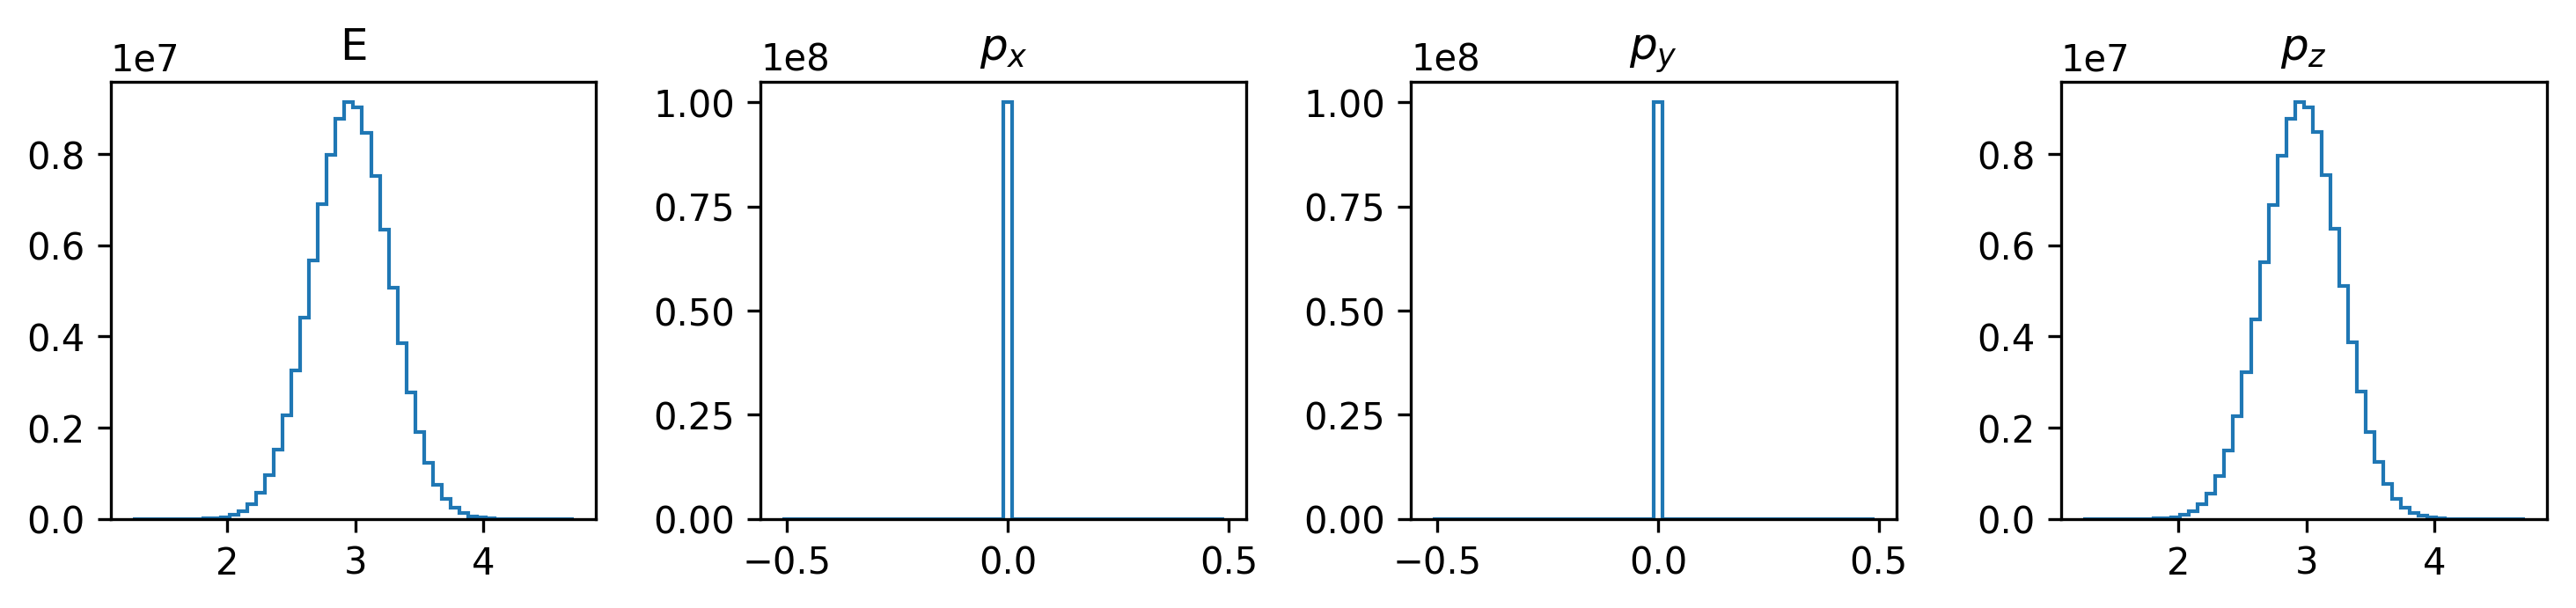

In [10]:
# Empty starting array
p4_pion = np.zeros((n_pions, 4))

# Generate pions with random p_z and no p_x,p_y. Energy based on mass and momentum
p4_pion[:,3] = np.random.normal(loc = p_mean, scale = p_sigma, size = n_pions)
p4_pion[:,0] = np.sqrt(p4_pion[:,3]**2 + m_pion**2)

# Look at 4-momentum histogram to make sure you are getting the expected behavior.
p4_hist(p4_pion)
plt.show()

#### Part 2

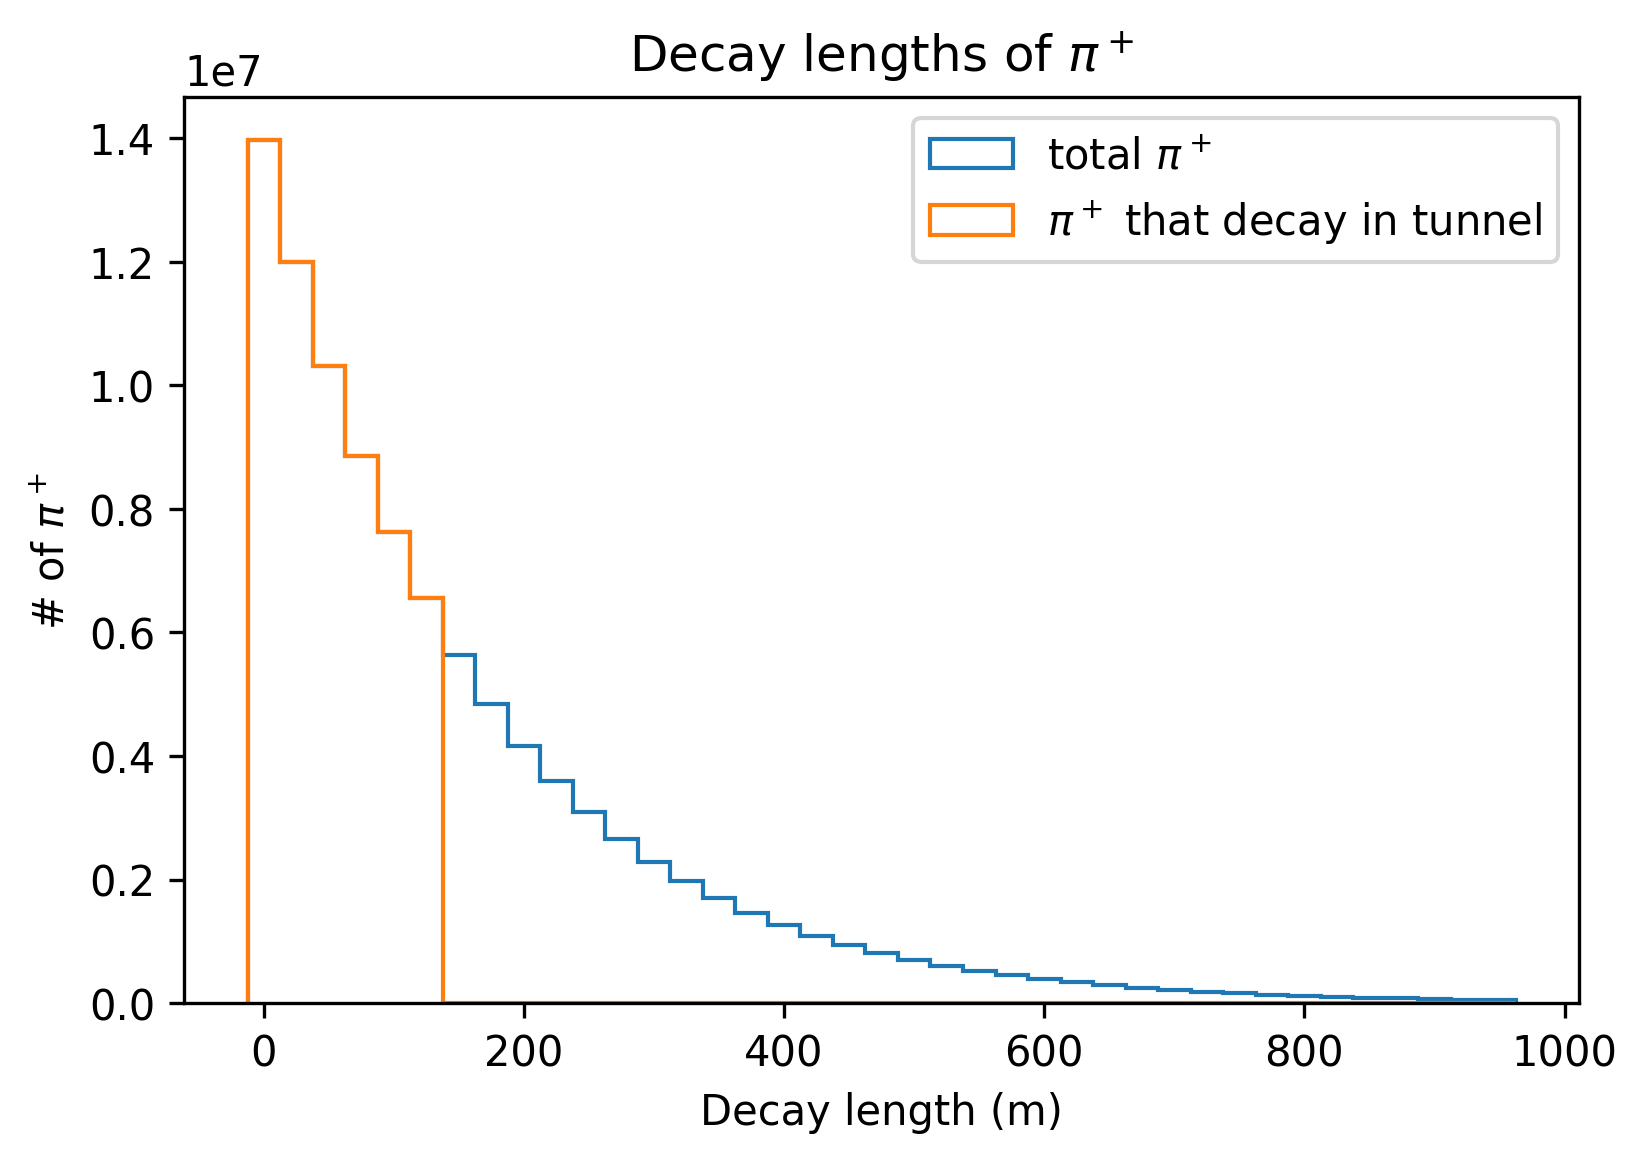

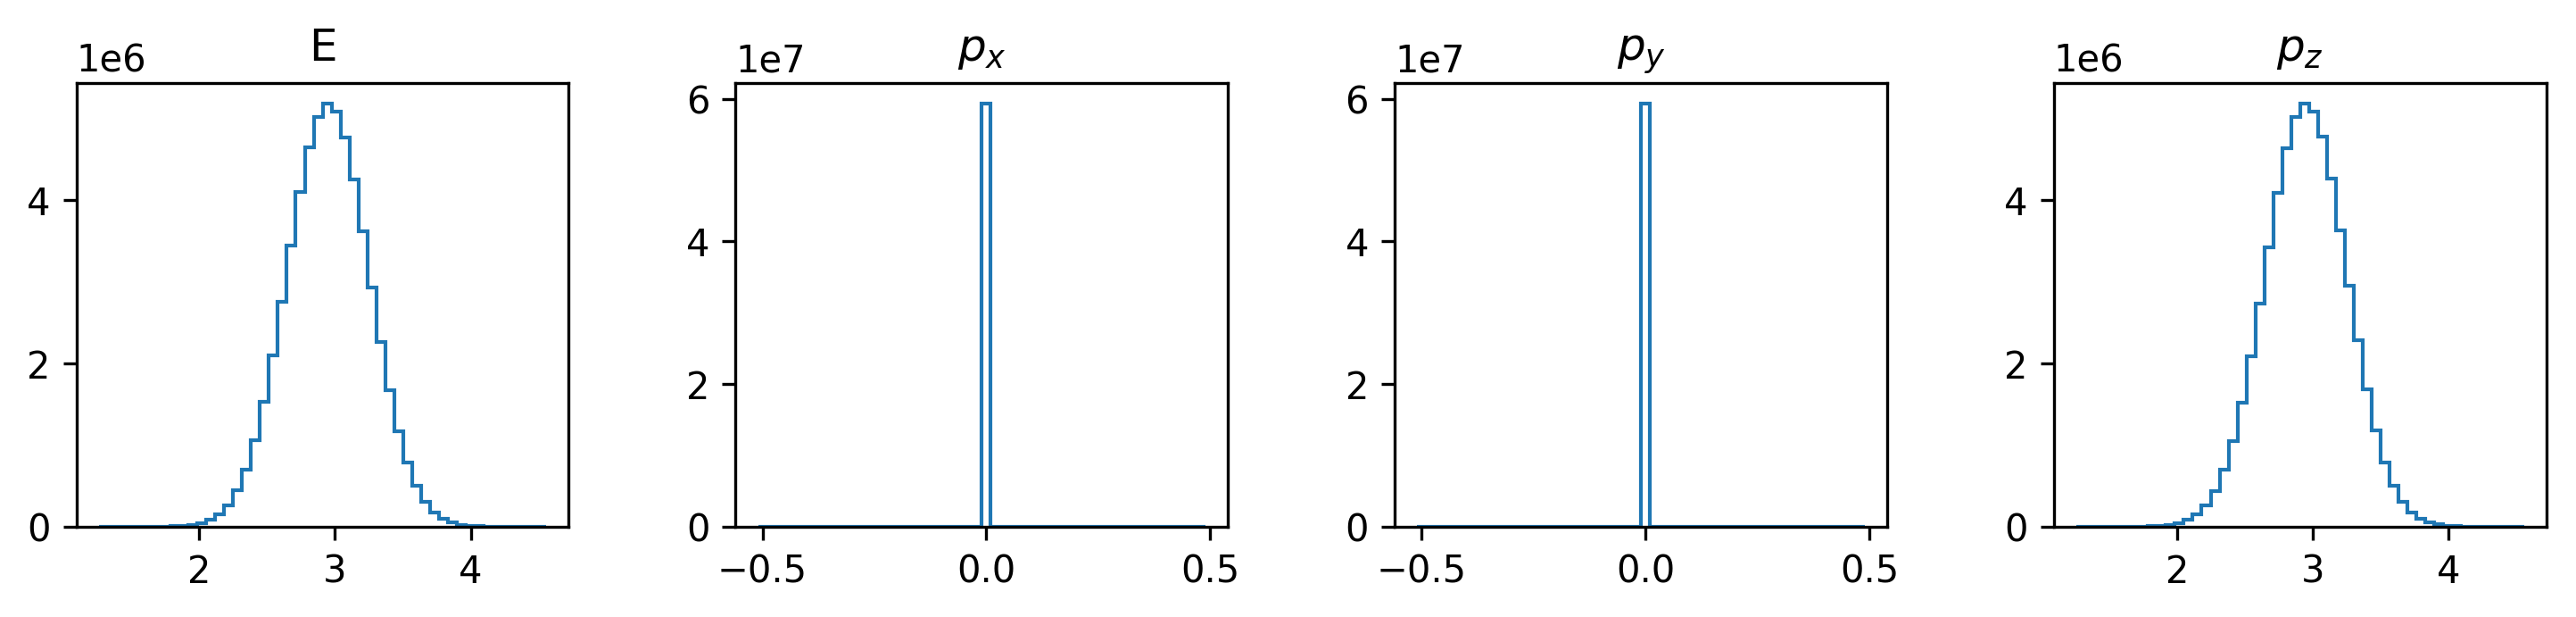

In [11]:
# Generate random decay points based on the exponential decay theory
length_p       = p4_pion[:,3]/m_pion*c*t_pion
pi_decay_point = np.random.exponential(length_p)

# Take only the pions that decay inside the tunnel. This creates a mask, a list of indicies of
# pi_decay_point where the given condition is true. Masks can be used to extract specific indicies
# from an array by slicing, as shown in the second and third lines. The comma is necessary to take only
# the first returned value of np.where. remaining_pions gives the new number of pions after applying
# the mask.
decay_mask,              = np.where(pi_decay_point < decay_length)
remaining_p4_pion        = p4_pion[decay_mask,:]
remaining_pi_decay_point = pi_decay_point[decay_mask]
remaining_pions          = len(remaining_pi_decay_point)

# Plot a histogram of the decay points to make sure you are getting the expected behavior. 
# Plot a histogram of the non-rejected pions to make sure the mask worked correctly.
fig, ax = plt.subplots()
bins = range(1000)[::25]
ax.hist(pi_decay_point, bins = bins, histtype = 'step', align = 'left', label = r'total $\pi^+$')
ax.hist(remaining_pi_decay_point, bins = bins, histtype = 'step', 
        align = 'left', label = r'$\pi^+$ that decay in tunnel')
ax.set_title(r'Decay lengths of $\pi^+$')
ax.set_xlabel('Decay length (m)')
ax.set_ylabel(r'# of $\pi^+$')
ax.legend()
plt.show()

# Look at 4-momentum histogram to make sure you are getting the expected behavior.
p4_hist(remaining_p4_pion)
plt.show()

#### Part 3

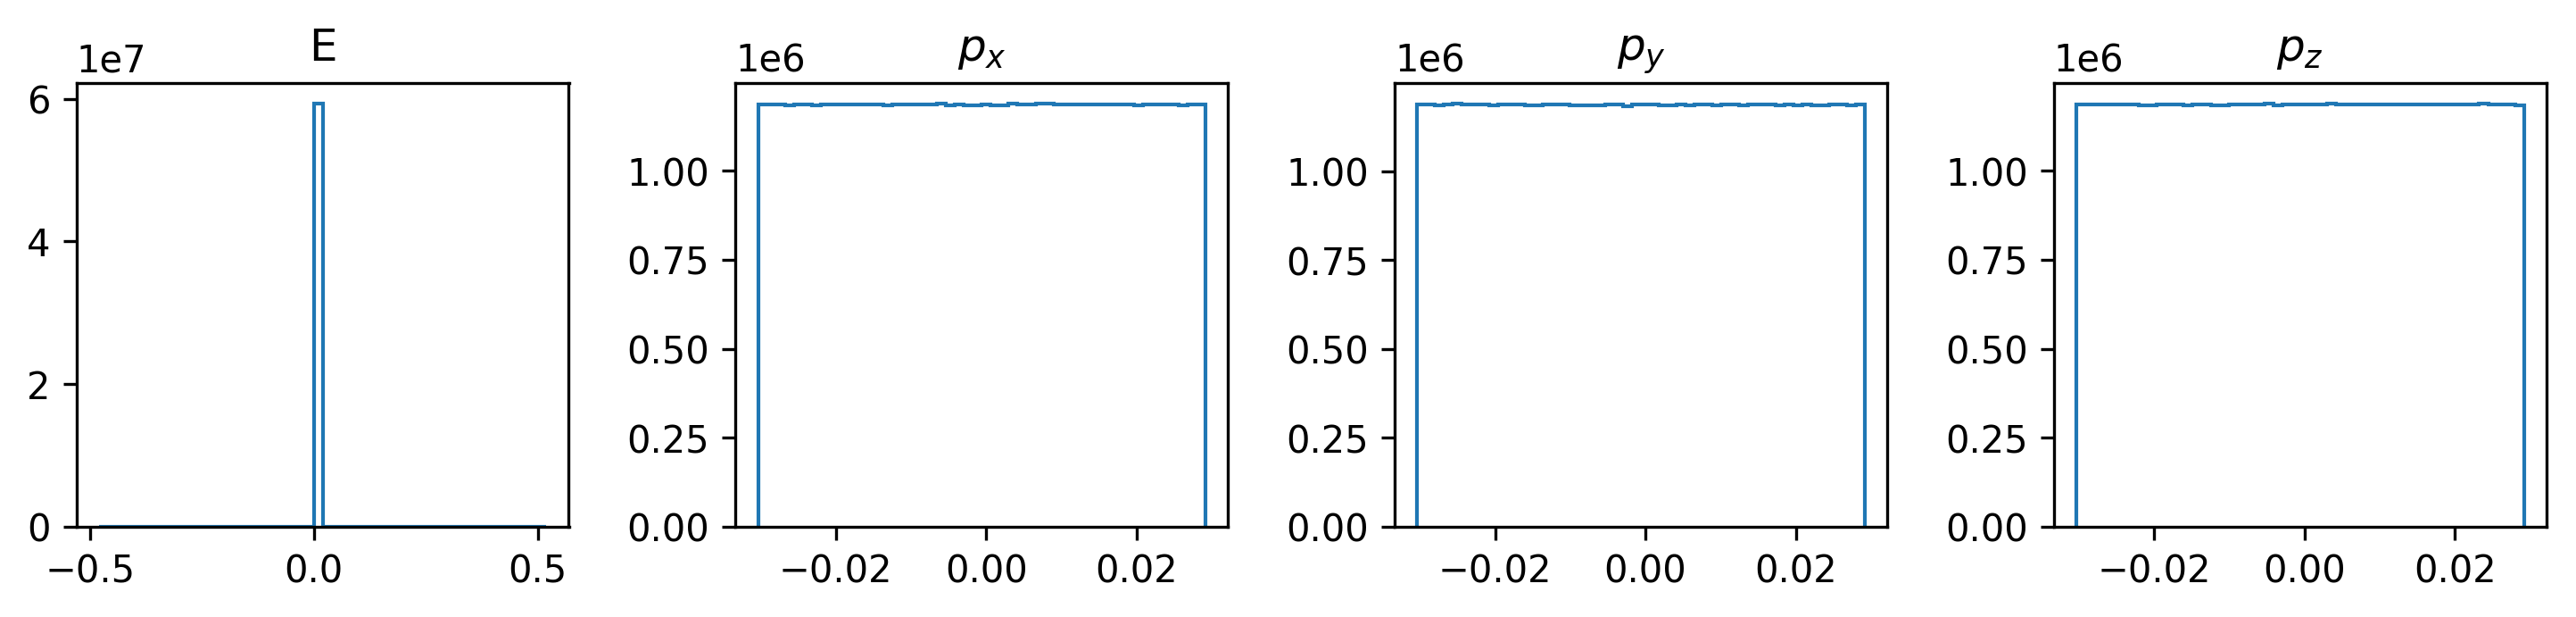

In [12]:
# Generate nu_mu in the rest frame using the two_body_decay_function
p4_neutrino_rest = two_body_decay(m_pion, m_numu, m_muon, size = remaining_pions)

# Look at 4-momentum histogram to make sure you are getting the expected behavior.
p4_hist(p4_neutrino_rest)
plt.show()

#### Part 4

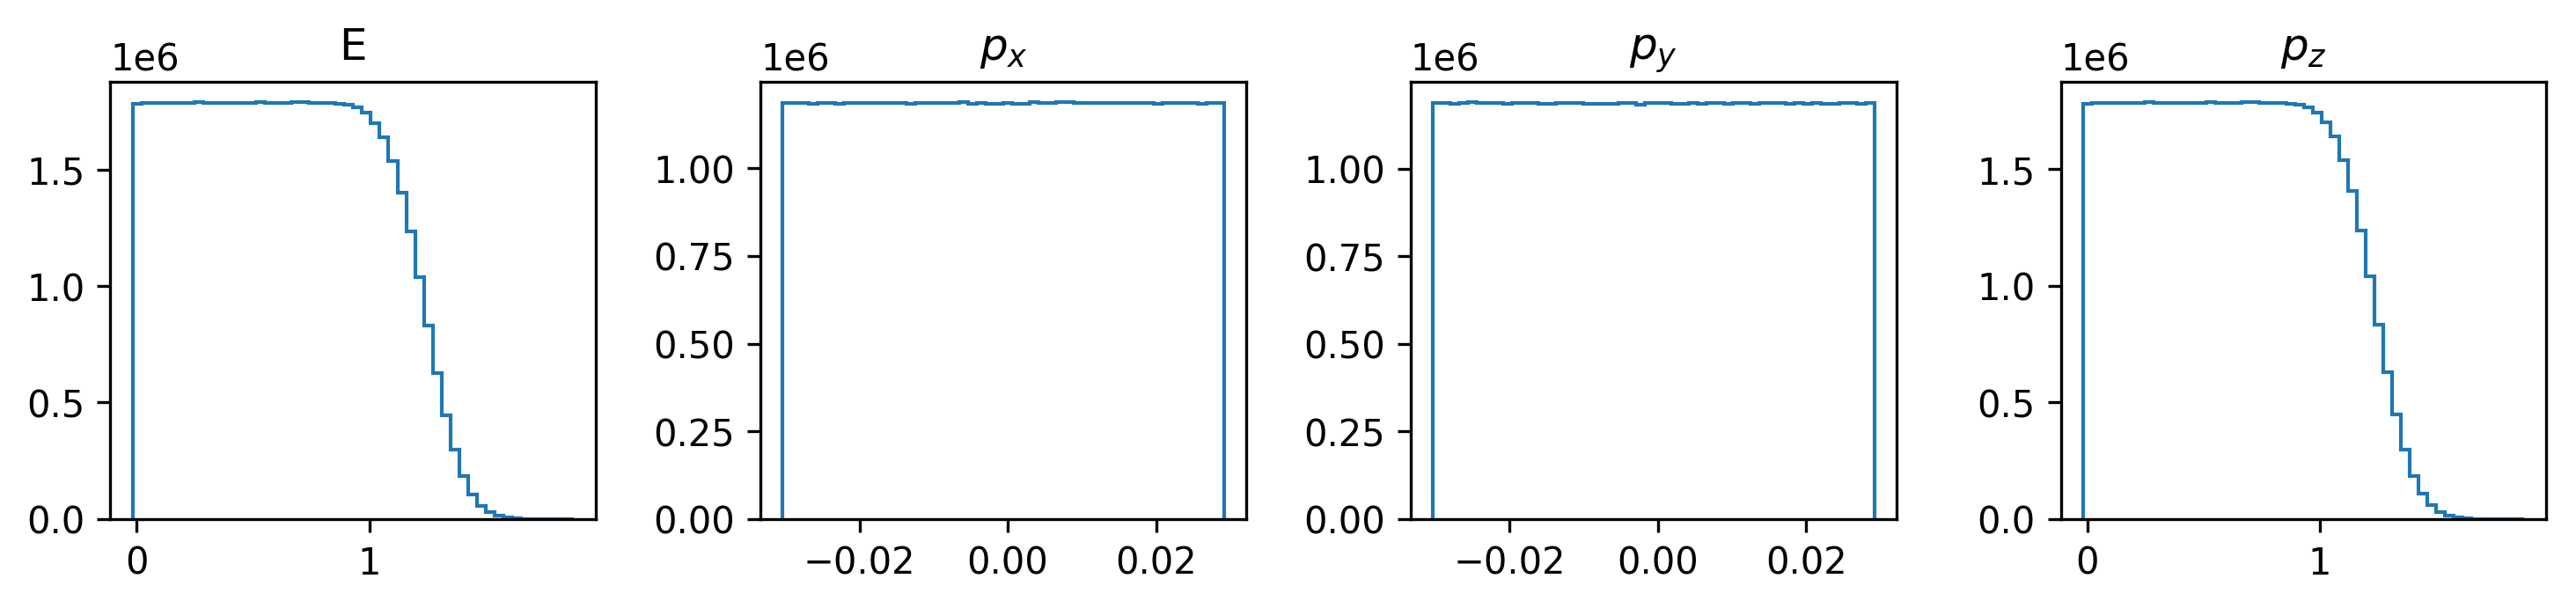

In [13]:
# Create gamma and beta arrays using the pion energies and momenta
gamma = remaining_p4_pion[:,0]/m_pion                 # gamma = E/m
beta  = remaining_p4_pion[:,3]/remaining_p4_pion[:,0] # beta  = P/E in these units

# Transform into the lab frame using the Lorentz_transform function
p4_neutrino_lab = Lorentz_transform(p4_neutrino_rest, gamma, beta)

# Look at 4-momentum histogram to make sure you are getting the expected behavior.
p4_hist(p4_neutrino_lab)
plt.show()

#### Part 5

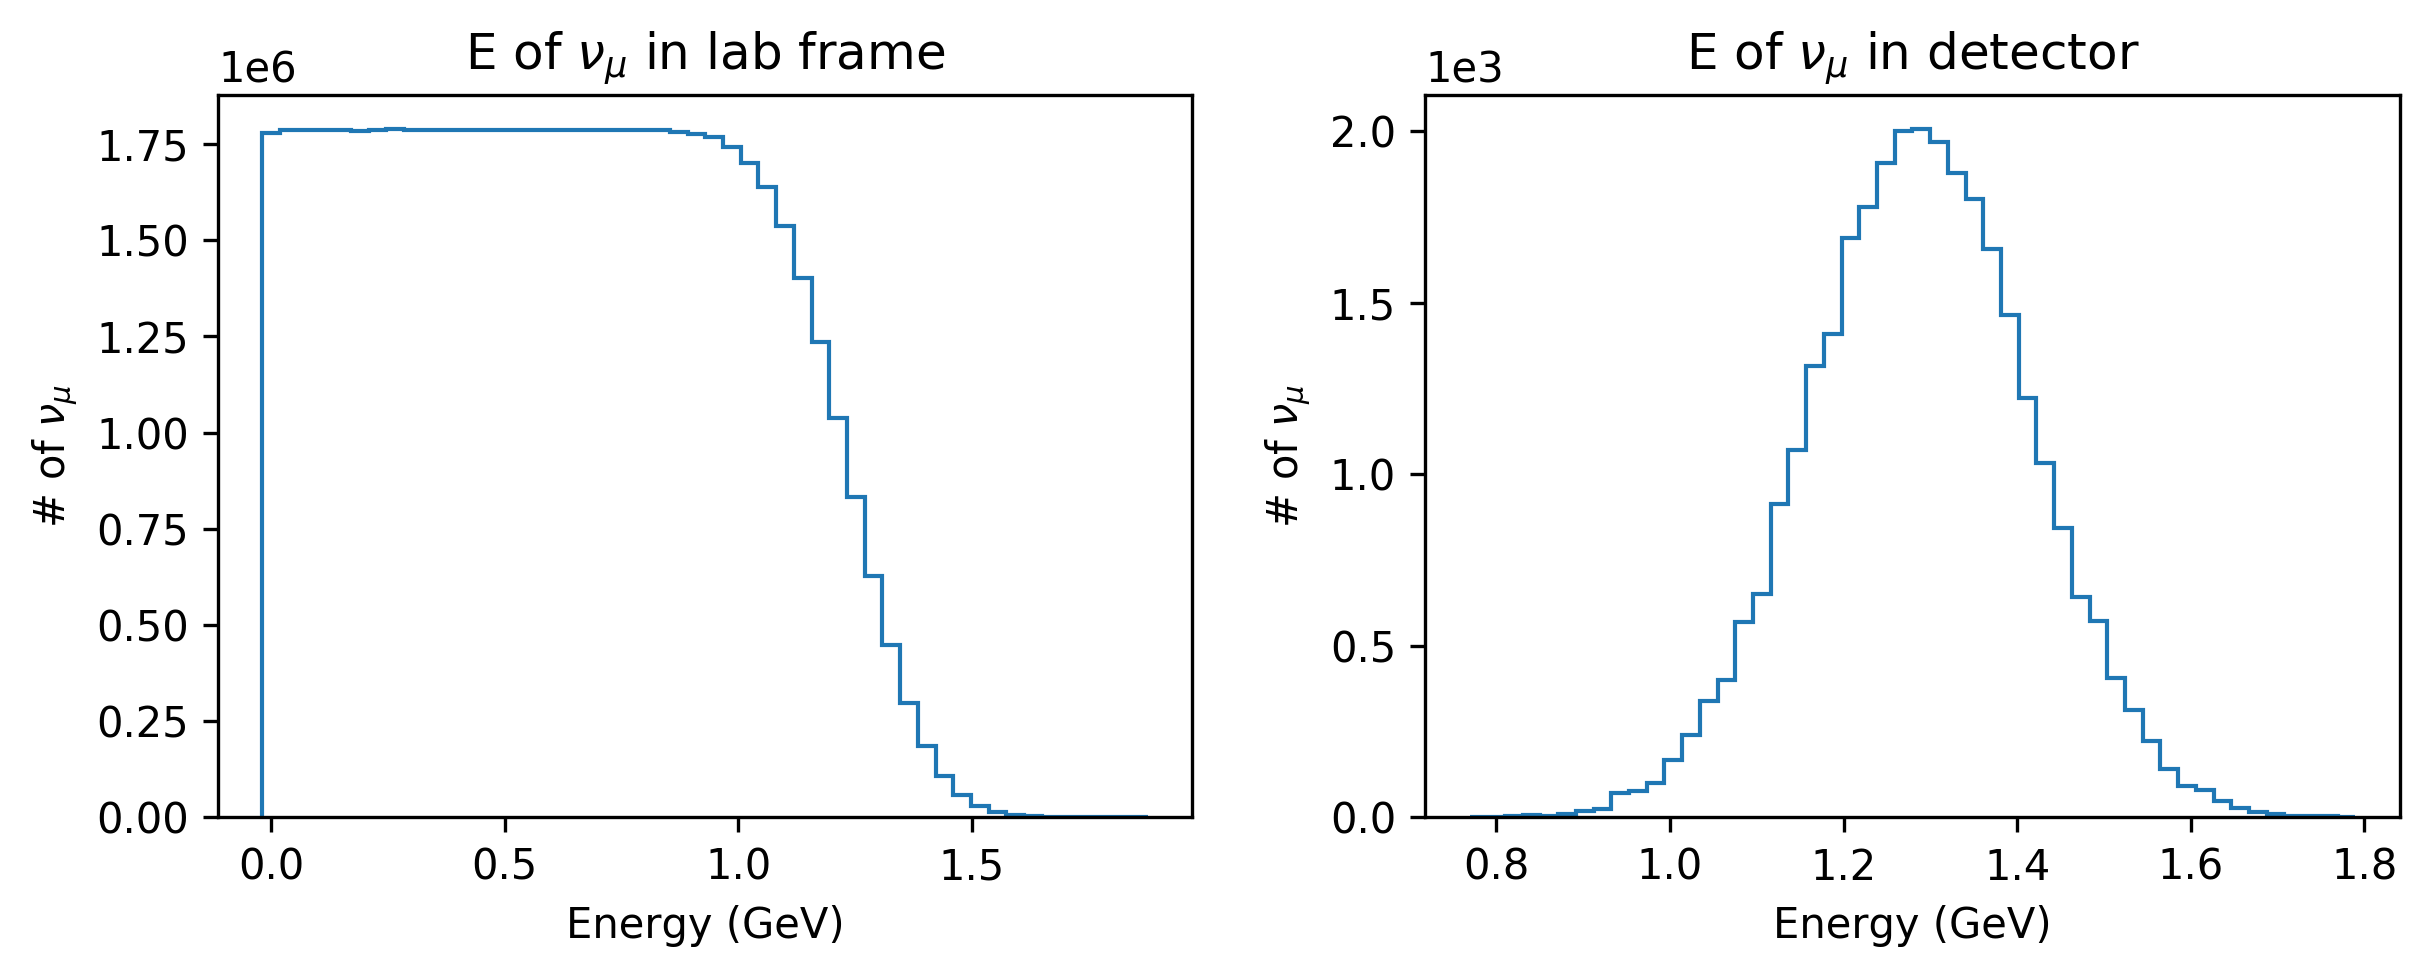

In [14]:
# Determine the maximum angle each nu_mu can have with the z-axis and still hit the 
# detector based on where each pion decayed
max_detector_angle = np.arctan(detect_rad/(location - remaining_pi_decay_point))

# Determine the angle each nu_mu has with the z-axis
magnitude = np.sqrt(p4_neutrino_lab[:,1]**2 + p4_neutrino_lab[:,2]**2 + p4_neutrino_lab[:,3]**2)
cos_theta = p4_neutrino_lab[:,3]/magnitude

# Use another mask to remove all nu_mu that do not hit the detector
hit_mask,       = np.where(np.arccos(cos_theta) < max_detector_angle)
p4_neutrino_hit = p4_neutrino_lab[hit_mask,:]

# Plot a histogram to compare the energy distribution of nu_mu in the lab frame and the energy distribution
# of nu_mu that the detector sees.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
fig.tight_layout(w_pad=2.5)
for ax, data, title in zip(axes.flatten(), [p4_neutrino_lab, p4_neutrino_hit], ['lab frame','detector']):
    ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
    ax.hist(data[:,0], bins = 50, histtype = 'step', align = 'left')
    ax.set_xlabel('Energy (GeV)')
    ax.set_ylabel(r'# of $\nu_\mu$')
    ax.set_title(r'E of $\nu_\mu$ in ' + title)
plt.show()